In [1]:
# ================================
# 📌 Step 1: Import Libraries
# ================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)


In [8]:
# ================================
# 📌 Step 2: Load Dataset
# ================================
df = pd.read_csv(r"C:\Users\Vasanth\Downloads\Hospital Patient .csv")

# Quick look
print(df.shape)
df.head()


(984, 15)


,Patient_ID,Age,Gender,Condition,Medication,Admission_Date,Discharge_Date,Patient_State,Year_of_Admission,Length_of_Stay,Readmission,Outcome,Satisfaction,Insurance_Claimed,Total_Cost
0,1,45,Female,Heart Disease,Angioplasty,07-02-2024,12-02-2024,Kerala,2024,5,No,Recovered,4,Yes,15000
1,2,60,Male,Diabetes,Insulin Therapy,11-03-2023,14-03-2023,Goa,2023,3,Yes,Stable,3,No,2000
2,3,32,Female,Fractured Arm,X-Ray and Splint,02-01-2025,03-01-2025,Maharastra,2025,1,No,Recovered,5,Yes,500
3,4,75,Male,Stroke,CT Scan and Medication,30-12-2023,06-01-2024,Manipur,2023,7,Yes,Stable,2,No,10000
4,5,50,Female,Cancer,Surgery and Chemotherapy,10-05-2022,20-05-2022,Mizoram,2022,10,No,Recovered,4,No,25000


In [ ]:
# ================================
# 📌 Step 4: Exploratory Data Analysis (EDA)
# ================================

# --- Demographics ---
print("Gender distribution:\n", df['Gender'].value_counts())
print("\nAge Statistics:\n", df['Age'].describe())

# Age groups
df['age_group'] = pd.cut(df['Age'], bins=[0,18,40,60,80,100],
                         labels=['Child','Young Adult','Adult','Senior','Elderly'])

#print the ages
print(df['age_group'].value_counts())




Gender distribution:
 Gender
Female    524
Male      460
Name: count, dtype: int64

Age Statistics:
 count    984.000000
mean      53.754065
std       14.941135
min       25.000000
25%       45.000000
50%       55.000000
75%       65.000000
max       78.000000
Name: Age, dtype: float64
age_group
Adult          425
Senior         328
Young Adult    231
Child            0
Elderly          0
Name: count, dtype: int64


C:\Users\Vasanth\AppData\Local\Temp\ipykernel_12272\3470791596.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Gender', data=df, palette="Set2")


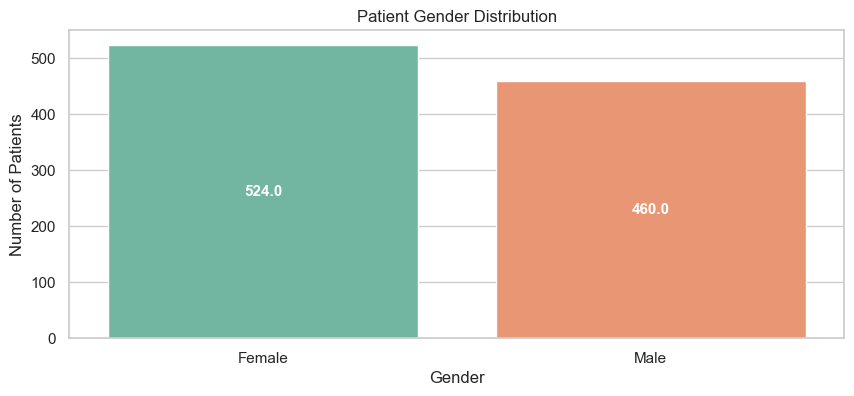

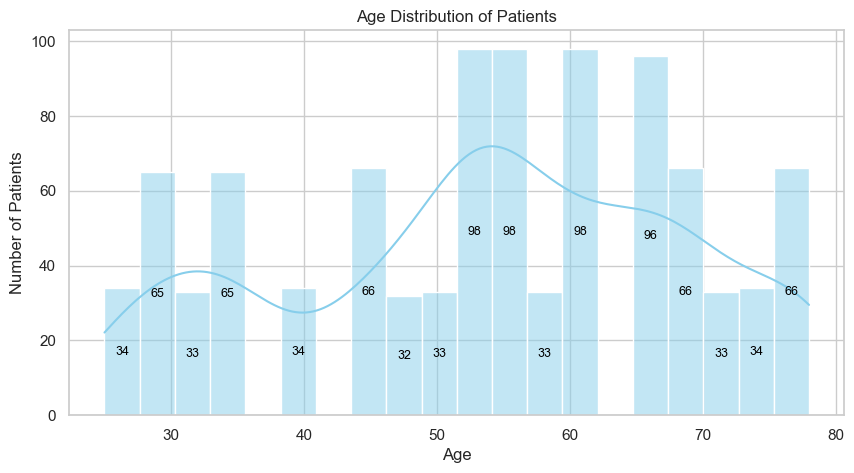

C:\Users\Vasanth\AppData\Local\Temp\ipykernel_12272\3470791596.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_conditions.values, y=top_conditions.index, palette="viridis")


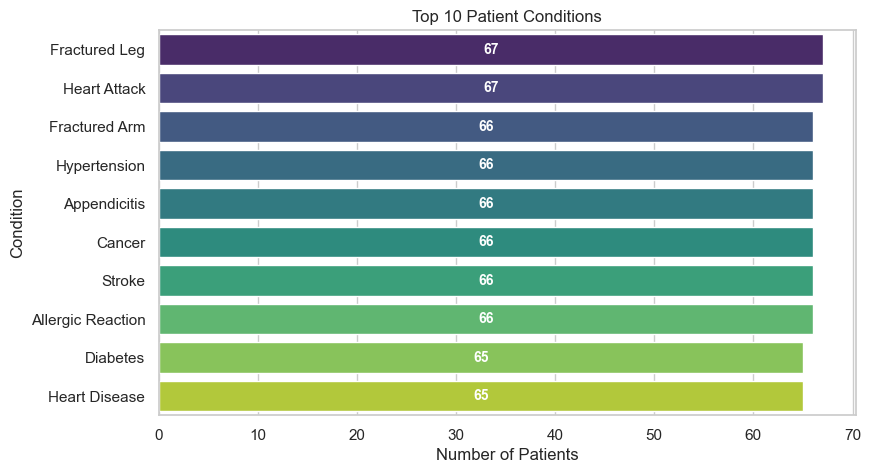

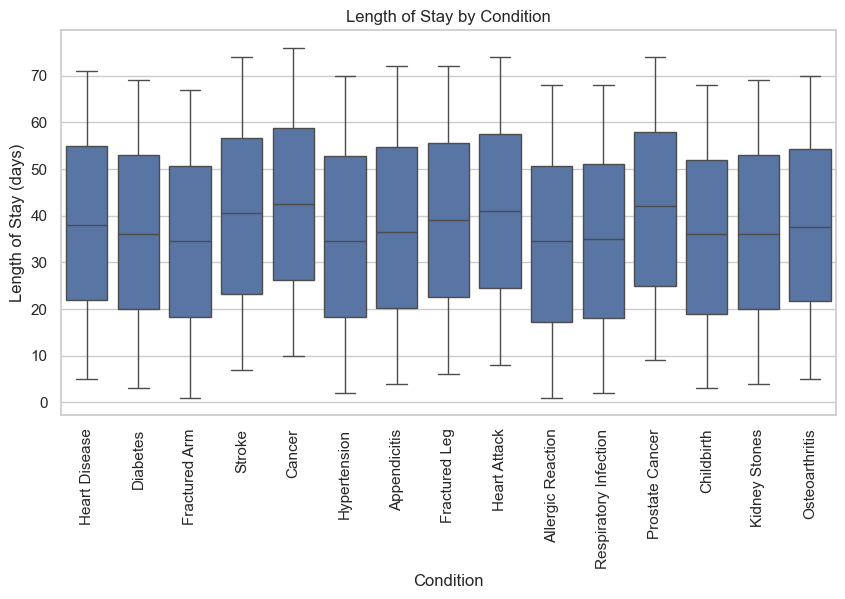

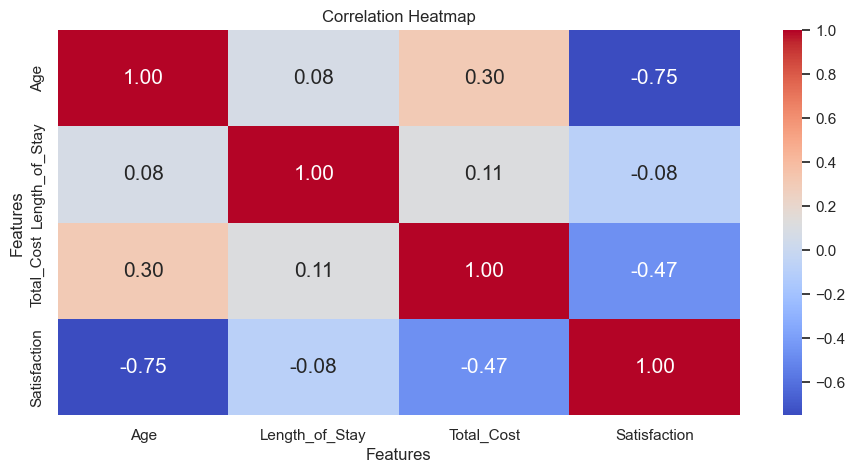

In [26]:
# ================================
# 📊 Step 5: Visualizations (with labels inside charts)
# ================================

import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Gender distribution
plt.figure(figsize=(10,4))
ax = sns.countplot(x='Gender', data=df, palette="Set2")
plt.title("Patient Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")

# Add labels inside bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2., p.get_height()/2),  # middle of bar
                ha='center', va='center', color='white', fontsize=11, fontweight='bold')
plt.show()


# -------------------------------
# Age distribution
plt.figure(figsize=(10,5))
ax = sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")

# Add labels inside bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # avoid labeling empty bins
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width()/2., height/2), 
                    ha='center', va='center', color='black', fontsize=9)
plt.show()


# -------------------------------
# Top conditions
plt.figure(figsize=(9,5))
top_conditions = df['Condition'].value_counts().head(10)
ax = sns.barplot(x=top_conditions.values, y=top_conditions.index, palette="viridis")
plt.title("Top 10 Patient Conditions")
plt.xlabel("Number of Patients")
plt.ylabel("Condition")

# Add labels inside bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width()/2, p.get_y() + p.get_height()/2), 
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')
plt.show()


# -------------------------------
# Length of stay by condition (boxplot)
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='Condition', y='Length_of_Stay', data=df)
plt.xticks(rotation=90)
plt.title("Length of Stay by Condition")
plt.xlabel("Condition")
plt.ylabel("Length of Stay (days)")
plt.show()


# -------------------------------
# Correlation heatmap
plt.figure(figsize=(11,5))
corr = df[['Age','Length_of_Stay','Total_Cost','Satisfaction']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":15})
plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()


C:\Users\Vasanth\AppData\Local\Temp\ipykernel_12272\2243216768.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Insurance_Claimed', y='Total_Cost', data=df, estimator=np.mean, palette="Set2")


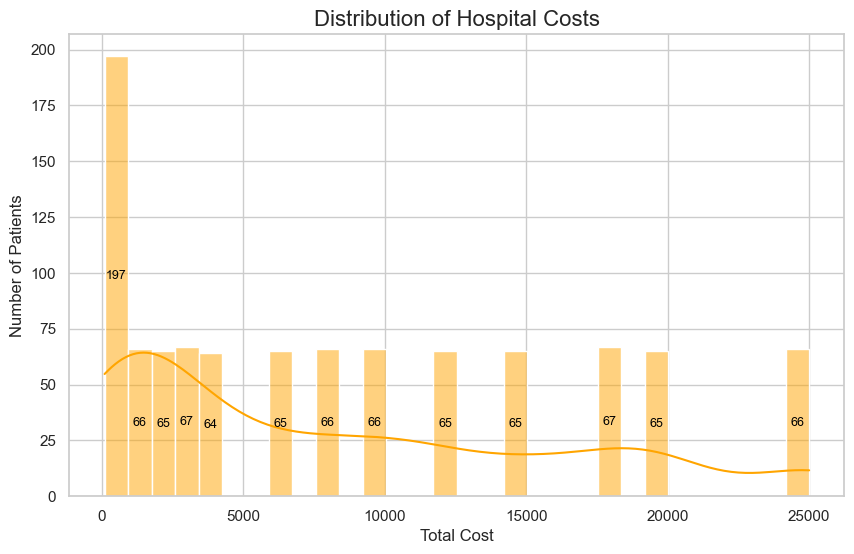

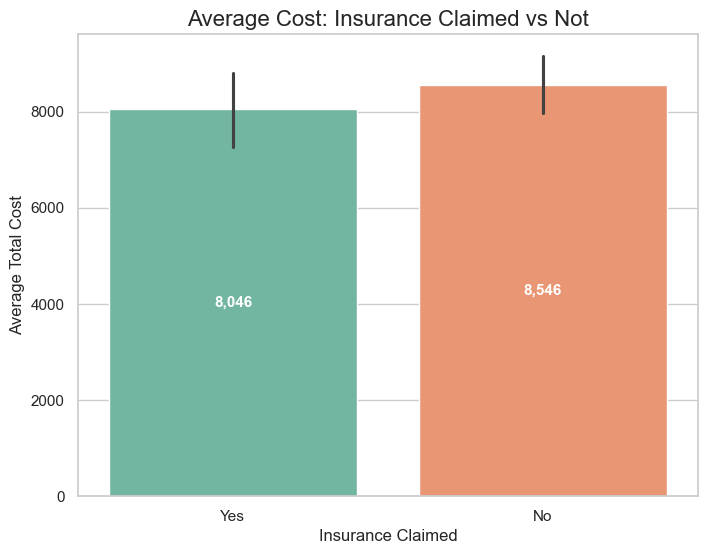

In [31]:
# ================================
# 📌 Step 6: Healthcare Costs & Insurance
# ================================

plt.figure(figsize=(10,6))
ax = sns.histplot(df['Total_Cost'], bins=30, kde=True, color='orange')
plt.title("Distribution of Hospital Costs", fontsize=16)
plt.xlabel("Total Cost", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)

# Add labels inside bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:   # avoid empty bins
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width()/2., height/2),
                    ha='center', va='center', fontsize=9, color='black')

# Average cost by insurance
plt.figure(figsize=(8,6))
ax = sns.barplot(x='Insurance_Claimed', y='Total_Cost', data=df, estimator=np.mean, palette="Set2")
plt.title("Average Cost: Insurance Claimed vs Not", fontsize=16)
plt.xlabel("Insurance Claimed", fontsize=12)
plt.ylabel("Average Total Cost", fontsize=12)

# Add labels on top of bars
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:,.0f}',   # format without decimals
                (p.get_x() + p.get_width()/2., value/2),  # inside bar
                ha='center', va='center', fontsize=11, color='white', fontweight='bold')
plt.show()


C:\Users\Vasanth\AppData\Local\Temp\ipykernel_12272\2588748967.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Outcome', data=df, palette="Set1")


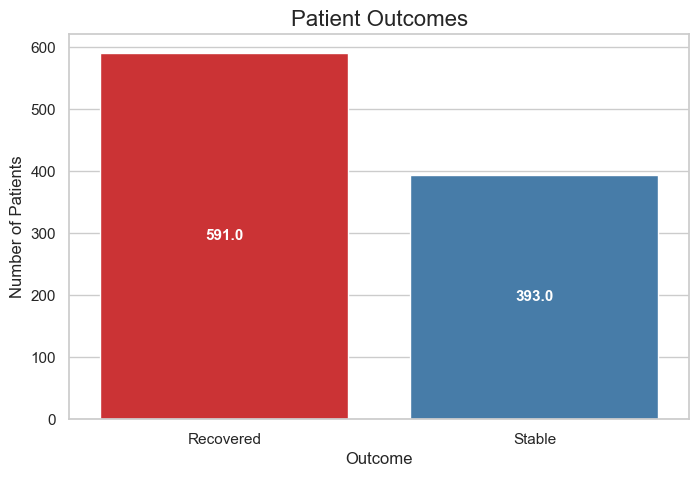

C:\Users\Vasanth\AppData\Local\Temp\ipykernel_12272\2588748967.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='Outcome', y='Satisfaction', data=df, palette="Set2")


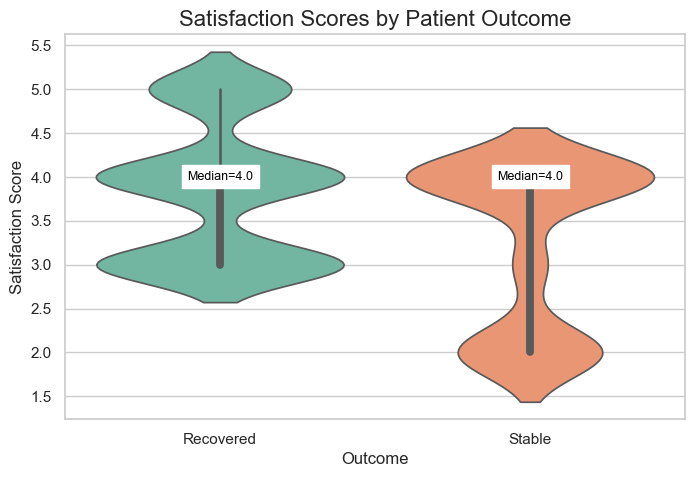

Readmission Rates (%):
 Readmission
No     73.170732
Yes    26.829268
Name: proportion, dtype: float64


In [32]:
# ================================
# 📌 Step 7: Outcomes & Satisfaction (with labels)
# ================================

import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Outcomes count
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Outcome', data=df, palette="Set1")
plt.title("Patient Outcomes", fontsize=16)
plt.xlabel("Outcome", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)

# Add labels inside bars
for p in ax.patches:
    count = p.get_height()
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width()/2., count/2), 
                ha='center', va='center', fontsize=11, color='white', fontweight='bold')
plt.show()


# -------------------------------
# Satisfaction vs Outcome (violin plot with median labels)
plt.figure(figsize=(8,5))
ax = sns.violinplot(x='Outcome', y='Satisfaction', data=df, palette="Set2")
plt.title("Satisfaction Scores by Patient Outcome", fontsize=16)
plt.xlabel("Outcome", fontsize=12)
plt.ylabel("Satisfaction Score", fontsize=12)

# Add median labels
medians = df.groupby("Outcome")["Satisfaction"].median()
for xtick, median in enumerate(medians):
    ax.annotate(f'Median={median:.1f}', 
                xy=(xtick, median), 
                xycoords='data',
                ha='center', va='center', fontsize=9, color='black', backgroundcolor='white')
plt.show()


# -------------------------------
# Readmission rates
readmit_rate = df['Readmission'].value_counts(normalize=True) * 100
print("Readmission Rates (%):\n", readmit_rate)



In [33]:
# ================================
# 📌 Step 8: Advanced Insights
# ================================

# Avg stay by condition
stay_condition = df.groupby('Condition')['Length_of_Stay'].mean().sort_values(ascending=False).head(10)
print("Conditions with Longest Average Stay:\n", stay_condition)

# Avg cost by age group
cost_age = df.groupby('age_group')['Total_Cost'].mean()
print("\nAverage Cost by Age Group:\n", cost_age)

# Insurance impact on cost
ins_impact = df.groupby('Insurance_Claimed')['Total_Cost'].mean()
print("\nInsurance vs Cost:\n", ins_impact)


Conditions with Longest Average Stay:
 Condition
Cancer             42.651515
Prostate Cancer    41.584615
Heart Attack       41.000000
Stroke             40.333333
Fractured Leg      39.000000
Heart Disease      38.215385
Osteoarthritis     37.859375
Appendicitis       37.439394
Kidney Stones      36.461538
Diabetes           36.092308
Name: Length_of_Stay, dtype: float64

Average Cost by Age Group:
 age_group
Child                   NaN
Young Adult     3989.610390
Adult          10503.529412
Senior          8682.926829
Elderly                 NaN
Name: Total_Cost, dtype: float64

Insurance vs Cost:
 Insurance_Claimed
No     8545.655608
Yes    8046.153846
Name: Total_Cost, dtype: float64


C:\Users\Vasanth\AppData\Local\Temp\ipykernel_12272\1334686805.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cost_age = df.groupby('age_group')['Total_Cost'].mean()


In [ ]:
# ================================
# 📌 Step 9: Save Cleaned Data & Report
# ================================
df.to_csv("cleaned_hospital_dataset.csv", index=False)
print("Cleaned dataset saved!")




Cleaned dataset saved!
